# Assignment 2 - Clustering

Some basic code has been provided for you. You will need to make some small edits to complete the tasks in the instructions document. 

Feel free to write additional code as needed to support/illuminate your discussion in your report.

Code References:
#Clustering Formulas

Raune, E. (2022) Example Jupyter Notebook for Assignment 2

#RNG Seed

Woodcock, H. (2021) Stop using numpy.random.seed(). Towards Data Science. Available at: https://towardsdatascience.com/stop-using-numpy-random-seed-581a9972805f   Accessed (15th March 2022)

In [1]:
import numpy as np
from numpy import unique  # can also just use np.unique
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from __future__ import division, print_function
import skfuzzy as fuzz

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

# Task 1

Load in the <code>salary_data.csv</code> dataset which has 50 data points and two dimensions (age, salary).

Randomly generate a dataset with <b>50</b> data points using the <code>generate_random_data</code> method below.

Run kmeans 10 times on each dataset.

#### Import Salary Dataset

In [2]:
salary_data = pd.read_csv('data/salary_data.csv')
print(salary_data.shape)
salary_data.head()

(49, 2)


age  income
0   14    2500
1   15    5500
2   16    5000
3   15    4500
4   16    2000

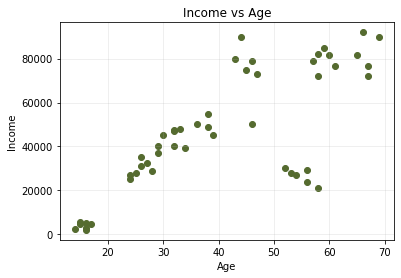

In [3]:
plt.scatter(salary_data.age, salary_data.income, color = "darkolivegreen")
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Income vs Age")
plt.grid(True, alpha = 0.25)

#### 1.1 Generate Random Data

In [2]:
def generate_random_data(n, seed):
    '''function to generate n random 2D data points stored in an (n, 2) dataframe'''
    #RNG formula from Woodcock(2021)
    rng = np.random.default_rng(seed)
    return pd.DataFrame({'x':rng.random(n), 'y':rng.random(n)})


Every time you run the <code>generate_random_data</code> function you will generate a new dataset so make sure you assign your dataset to a variable and don't write over that variable unless you're finished with it.

In [3]:
########## EVERY TIME YOU RUN THIS YOU WILL GENERATE NEW DATA ##########

# set n equal to the size of the dataset you want
rand_data = generate_random_data(50,303)
print(rand_data)

           x         y
0   0.214432  0.018088
1   0.416822  0.439551
2   0.807695  0.471847
3   0.273923  0.328572
4   0.815780  0.216186
5   0.107633  0.061168
6   0.436402  0.821003
7   0.838832  0.550422
8   0.198665  0.887566
9   0.302658  0.778283
10  0.343154  0.395855
11  0.211868  0.070355
12  0.920849  0.311554
13  0.557113  0.948036
14  0.845703  0.838232
15  0.534511  0.459887
16  0.248459  0.249622
17  0.264243  0.567986
18  0.946537  0.780618
19  0.209455  0.502608
20  0.009759  0.451228
21  0.625935  0.361885
22  0.339230  0.237312
23  0.462945  0.325250
24  0.131722  0.450234
25  0.487515  0.098224
26  0.151100  0.925816
27  0.630530  0.889797
28  0.006966  0.186731
29  0.584954  0.228079
30  0.580177  0.401917
31  0.591558  0.530795
32  0.679731  0.227336
33  0.373040  0.399459
34  0.714616  0.716760
35  0.800633  0.624797
36  0.894627  0.814540
37  0.568305  0.653557
38  0.947986  0.511682
39  0.826743  0.817390
40  0.571354  0.715298
41  0.024327  0.469240
42  0.74760

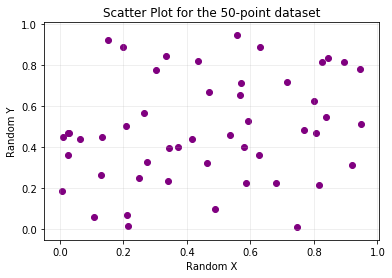

In [4]:
plt.scatter(rand_data.x, rand_data.y, color = "purple")
plt.xlabel("Random X")
plt.ylabel("Random Y")
plt.title("Scatter Plot for the 50-point dataset")
plt.grid(True, alpha = 0.25)

### 1.2 Run K-means
Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [9]:
# use this function to run kmeans on your dataframe

def run_kmeans(k, dataset, seed, x_col='', y_col=''):
    # let's make a copy of the dataframe so we can freely add columns
    df = dataset.copy(deep=True) # just for our use case, don't do this as standard

    kmeans = KMeans(n_clusters=k, init='random', n_init=1, random_state = seed)
    kmeans.fit(dataset)
    cluster_labels = kmeans.fit_predict(dataset)
    df[f'cluster_labels'] = cluster_labels
    plt.scatter(df[x_col], df[y_col], c=kmeans.labels_.astype(float))
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title("Trial with Seed {}".format(seed))
    plt.grid(True, alpha = 0.25)
    
    plt.show()
    
    return df

In [10]:
#Function for multiple iterations in one

def run_kmeans_10(k, dataset, seed, x_col='', y_col=''):
    # let's make a copy of the dataframe so we can freely add columns
    df = dataset.copy(deep=True) # just for our use case, don't do this as standard

    kmeans = KMeans(n_clusters=k, init='random', n_init=10, random_state = seed)
    kmeans.fit(dataset)
    cluster_labels = kmeans.fit_predict(dataset)
    df[f'cluster_labels'] = cluster_labels
    plt.scatter(df[x_col], df[y_col], c=kmeans.labels_.astype(float))
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title("Trial with Seed {}".format(seed))
    plt.grid(True, alpha = 0.25)
    
    plt.show()
    
    return df

Running on Salary

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

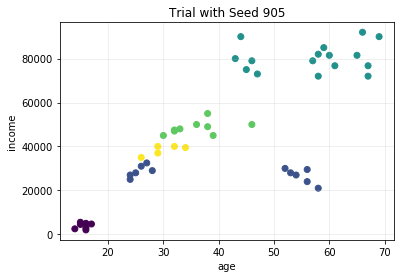

In [91]:
run_1_df = run_kmeans(5, salary_data, 905, x_col='age', y_col='income')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

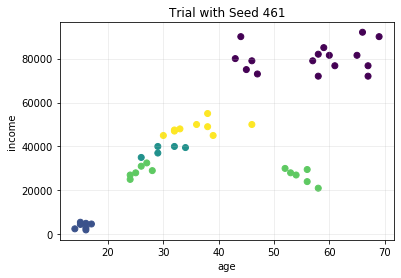

In [92]:
run_2_df = run_kmeans(5, salary_data, 461, x_col='age', y_col='income')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

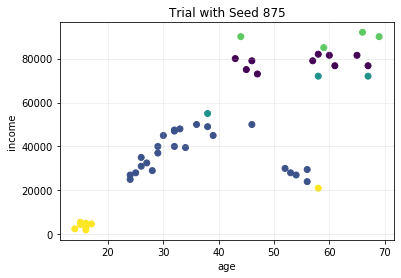

In [93]:
run_3_df = run_kmeans(5, salary_data, 875, x_col='age', y_col='income')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

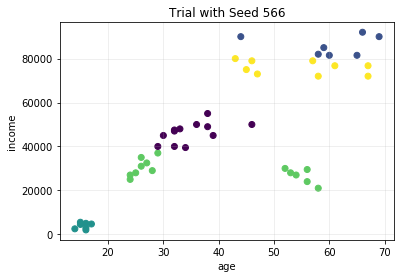

In [94]:
run_4_df = run_kmeans(5, salary_data, 566, x_col='age', y_col='income')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

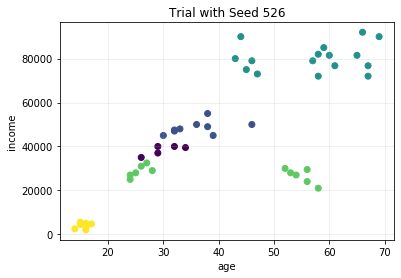

In [95]:
run_5_df = run_kmeans(5, salary_data, 526, x_col='age', y_col='income')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

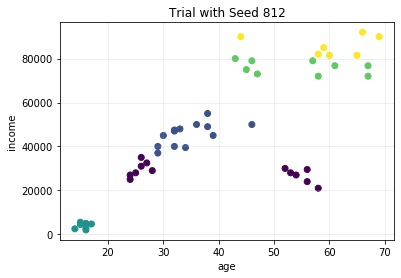

In [96]:
run_6_df = run_kmeans(5, salary_data, 812, x_col='age', y_col='income')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

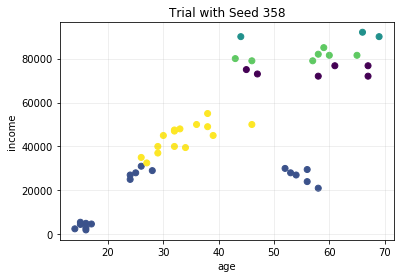

In [97]:
run_7_df = run_kmeans(5, salary_data, 358, x_col='age', y_col='income')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

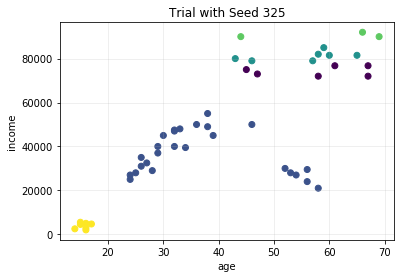

In [98]:
run_8_df = run_kmeans(5, salary_data, 325, x_col='age', y_col='income')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

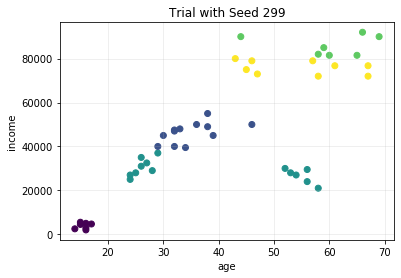

In [99]:
run_9_df = run_kmeans(5, salary_data, 299, x_col='age', y_col='income')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

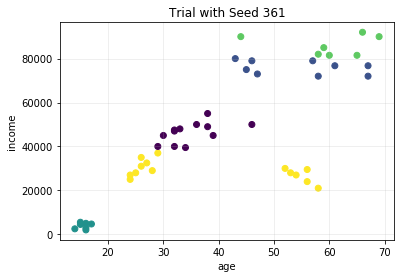

In [100]:
run_10_df = run_kmeans(5, salary_data, 361, x_col='age', y_col='income')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

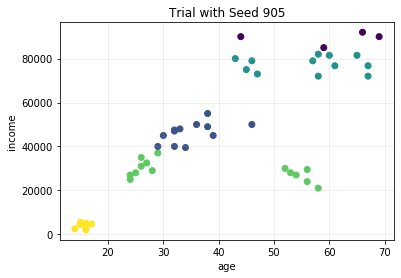

In [106]:
run_11_df = run_kmeans_10(5, salary_data, 905, x_col='age', y_col='income')

Running on 50-dataset

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

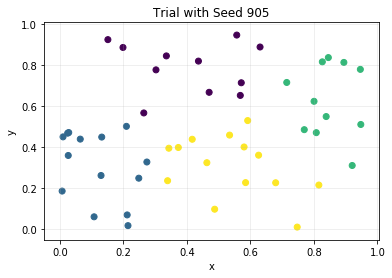

In [11]:
run_1_50 = run_kmeans(4, rand_data, 905, x_col='x', y_col='y')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

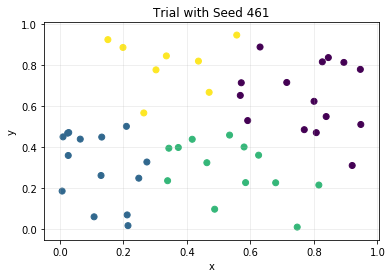

In [111]:
run_2_50 = run_kmeans(4, rand_data, 461, x_col='x', y_col='y')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

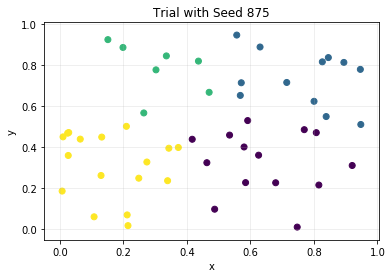

In [112]:
run_3_50 = run_kmeans(4, rand_data, 875, x_col='x', y_col='y')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

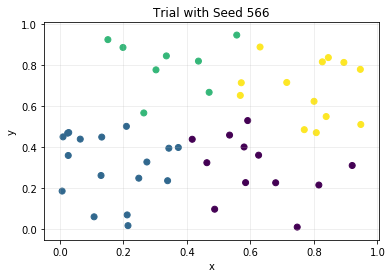

In [113]:
run_4_50 = run_kmeans(4, rand_data, 566, x_col='x', y_col='y')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

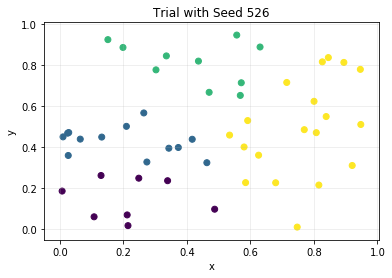

In [114]:
run_5_50 = run_kmeans(4, rand_data, 526, x_col='x', y_col='y')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

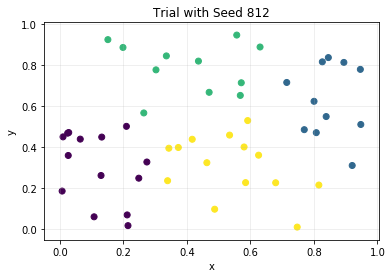

In [115]:
run_6_50 = run_kmeans(4, rand_data, 812, x_col='x', y_col='y')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

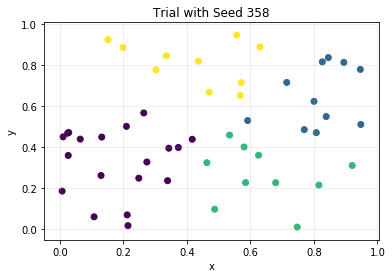

In [116]:
run_7_50 = run_kmeans(4, rand_data, 358, x_col='x', y_col='y')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

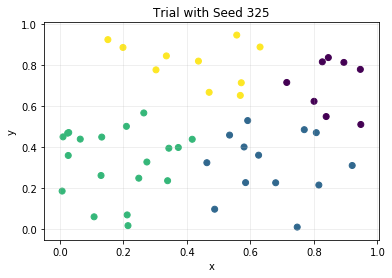

In [117]:
run_8_50 = run_kmeans(4, rand_data, 325, x_col='x', y_col='y')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

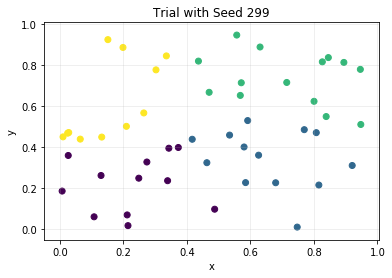

In [118]:
run_9_50 = run_kmeans(4, rand_data, 299, x_col='x', y_col='y')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

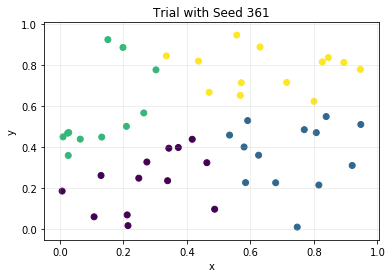

In [120]:
run_10_50 = run_kmeans(4, rand_data, 361, x_col='x', y_col='y')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

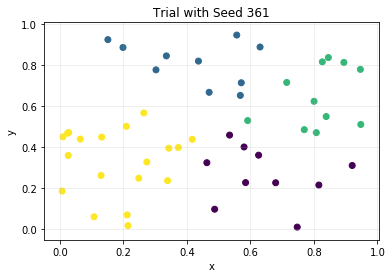

In [122]:
run_11_50 = run_kmeans_10(4, rand_data, 361, x_col='x', y_col='y')

# K-means ++

In [5]:
#Building a K-means ++ Functions

def run_kmeans_plus(k, dataset, seed, x_col='', y_col=''):
    # let's make a copy of the dataframe so we can freely add columns
    df = dataset.copy(deep=True) # just for our use case, don't do this as standard

    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1, random_state = seed)
    kmeans.fit(dataset)
    cluster_labels = kmeans.fit_predict(dataset)
    df[f'cluster_labels'] = cluster_labels
    plt.scatter(df[x_col], df[y_col], c=kmeans.labels_.astype(float))
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title("Trial with Seed {}".format(seed))
    plt.grid(True, alpha = 0.25)
    
    plt.show()
    
    return df

In [6]:
#K-means ++ with multiple iterations
def run_kmeans_plus10(k, dataset, seed, x_col='', y_col=''):
    # let's make a copy of the dataframe so we can freely add columns
    df = dataset.copy(deep=True) # just for our use case, don't do this as standard

    kmeans = KMeans(n_clusters=k, init='random', n_init=10, random_state = seed)
    kmeans.fit(dataset)
    cluster_labels = kmeans.fit_predict(dataset)
    df[f'cluster_labels'] = cluster_labels
    plt.scatter(df[x_col], df[y_col], c=kmeans.labels_.astype(float))
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title("Trial with Seed {}".format(seed))
    plt.grid(True, alpha = 0.25)
    
    plt.show()
    
    return df

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

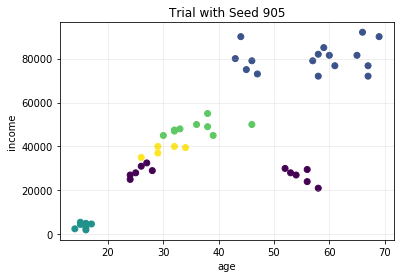

In [15]:
run_1_dfplus = run_kmeans_plus(5, salary_data, 905, x_col='age', y_col='income')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

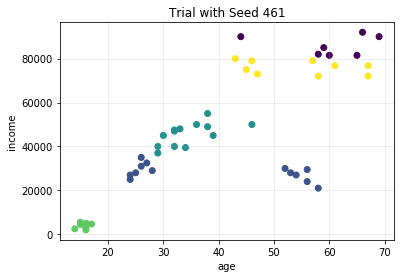

In [16]:
run_2_dfplus = run_kmeans_plus(5, salary_data, 461, x_col='age', y_col='income')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

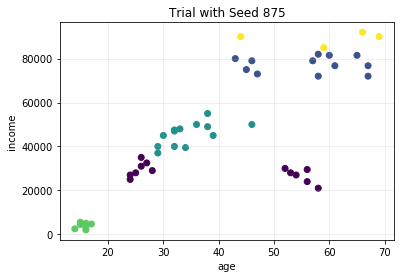

In [17]:
run_3_dfplus = run_kmeans_plus(5, salary_data, 875, x_col='age', y_col='income')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

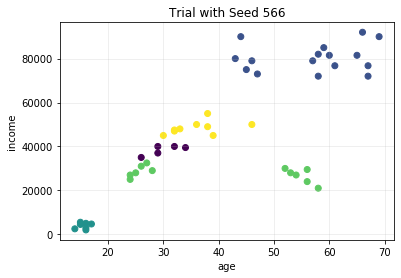

In [18]:
run_4_dfplus = run_kmeans_plus(5, salary_data, 566, x_col='age', y_col='income')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

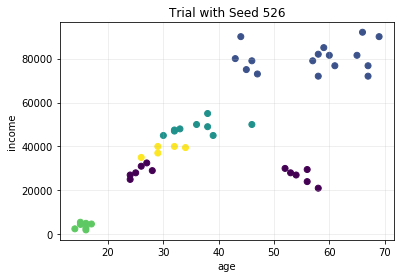

In [19]:
run_5_dfplus = run_kmeans_plus(5, salary_data, 526, x_col='age', y_col='income')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

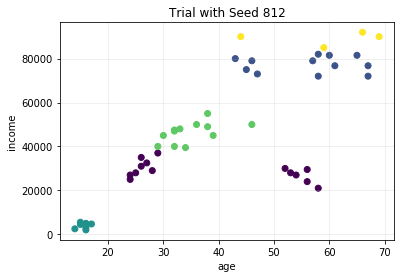

In [20]:
run_6_dfplus = run_kmeans_plus(5, salary_data, 812, x_col='age', y_col='income')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

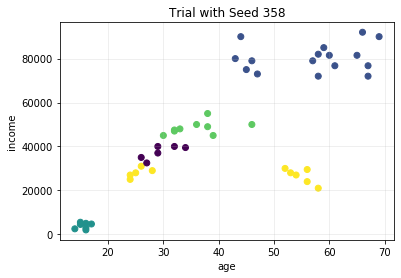

In [21]:
run_7_dfplus = run_kmeans_plus(5, salary_data, 358, x_col='age', y_col='income')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

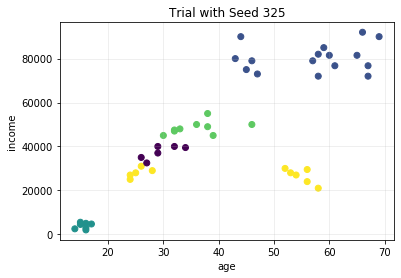

In [22]:
run_8_dfplus = run_kmeans_plus(5, salary_data, 325, x_col='age', y_col='income')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

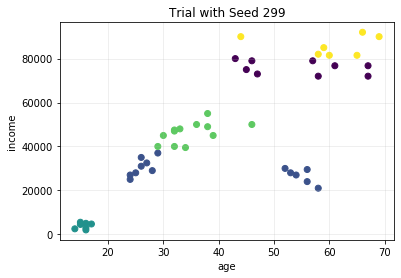

In [23]:
run_9_dfplus = run_kmeans_plus(5, salary_data, 299, x_col='age', y_col='income')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

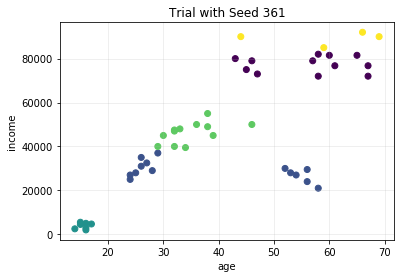

In [24]:
run_10_dfplus = run_kmeans_plus(5, salary_data, 361, x_col='age', y_col='income')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

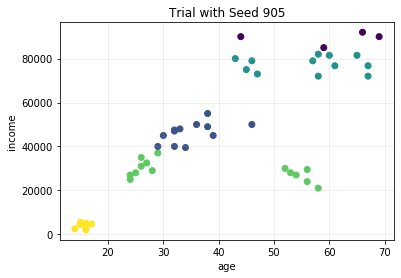

In [25]:
run_11_dfplus = run_kmeans_plus10(5, salary_data, 905, x_col='age', y_col='income')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

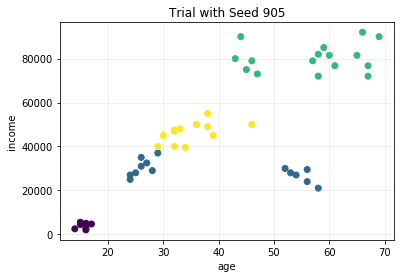

In [26]:
run_12_dfplus = run_kmeans_plus10(4, salary_data, 905, x_col='age', y_col='income')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

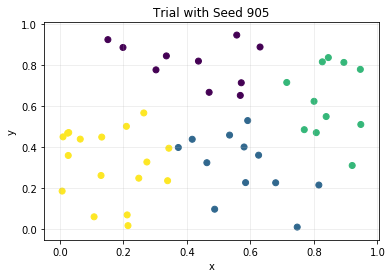

In [8]:
#Running k-means++ on the second dataset
run_1_50plus = run_kmeans_plus(4, rand_data, 905, x_col='x', y_col='y')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

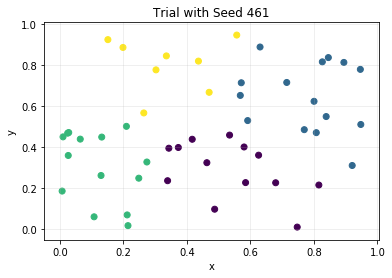

In [9]:
run_2_50plus = run_kmeans_plus(4, rand_data, 461, x_col='x', y_col='y')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

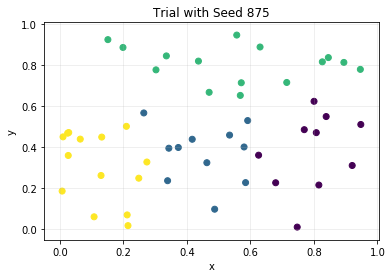

In [10]:
run_3_50plus = run_kmeans_plus(4, rand_data, 875, x_col='x', y_col='y')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

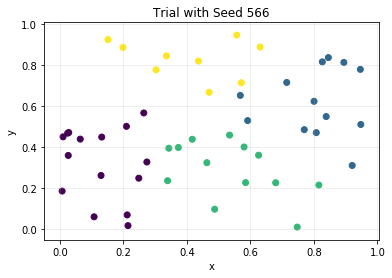

In [11]:
run_4_50plus = run_kmeans_plus(4, rand_data, 566, x_col='x', y_col='y')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

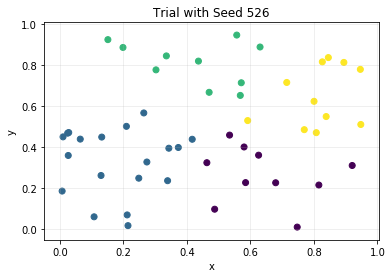

In [12]:
run_5_50plus = run_kmeans_plus(4, rand_data, 526, x_col='x', y_col='y')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

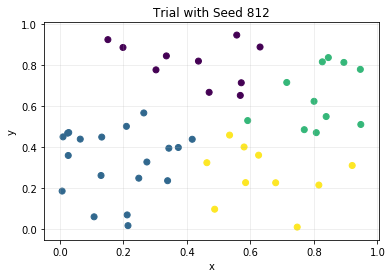

In [13]:
run_6_50plus = run_kmeans_plus(4, rand_data, 812, x_col='x', y_col='y')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

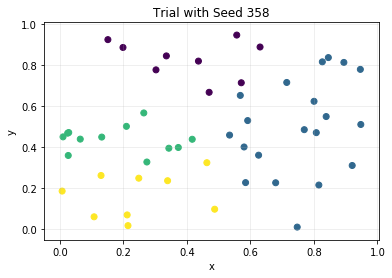

In [14]:
run_7_50plus = run_kmeans_plus(4, rand_data, 358, x_col='x', y_col='y')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

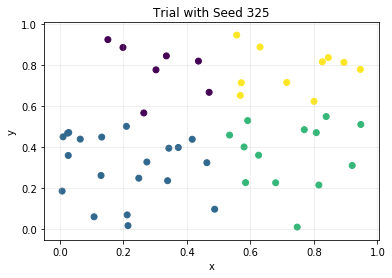

In [15]:
run_8_50plus = run_kmeans_plus(4, rand_data, 325, x_col='x', y_col='y')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

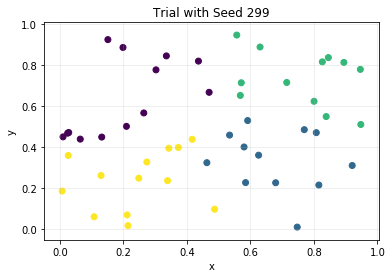

In [16]:
run_9_50plus = run_kmeans_plus(4, rand_data, 299, x_col='x', y_col='y')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

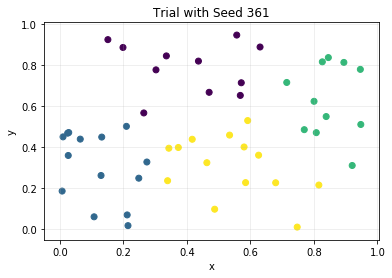

In [17]:
run_10_50plus = run_kmeans_plus(4, rand_data, 361, x_col='x', y_col='y')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

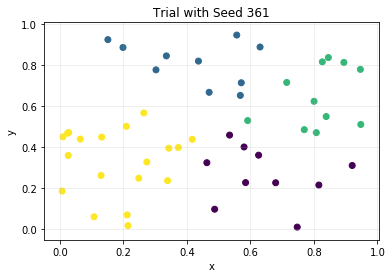

In [18]:
run_11_50plus = run_kmeans_plus10(4, rand_data, 361, x_col='x', y_col='y')

### Elbow Method

In [174]:
def get_elbow_plot(dataset, x_col='', y_col='', min_k=1, max_k=10):
    
    # for what values of k do we want to run
    k_range = range(min_k, max_k)

    # calculate sum of squared error for each value of k
    sse = [] # initialze empty list

    for k in k_range:
        km = KMeans(n_clusters=k) # set whatever other parameters you want here
        km.fit(dataset)
        sse.append(km.inertia_)

    plt.xlabel('K')
    plt.ylabel('Sum of Squared Error')
    plt.plot(k_range, sse, color = "mediumorchid")
    plt.grid(True, alpha = 0.25)
    plt.title("Elbow Plot")
    plt.show()

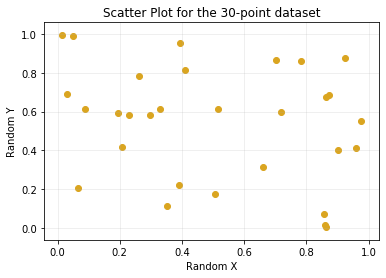

In [58]:
rand_data2 = generate_random_data(30,157)
plt.scatter(rand_data2.x, rand_data2.y, color = "goldenrod")
plt.xlabel("Random X")
plt.ylabel("Random Y")
plt.title("Scatter Plot for the 30-point dataset")
plt.grid(True, alpha = 0.25)

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

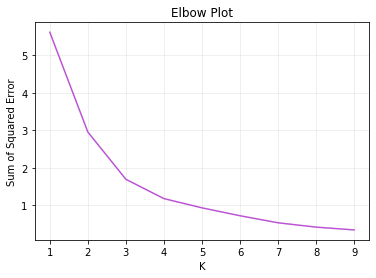

In [61]:
get_elbow_plot(rand_data2, x_col='x', y_col='y')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

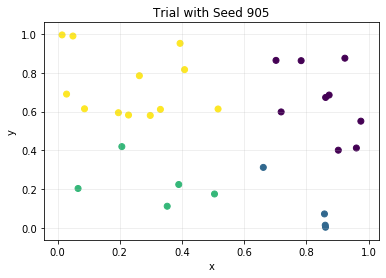

In [62]:
run_df30 = run_kmeans_plus10(4, rand_data2, 905, x_col='x', y_col='y')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

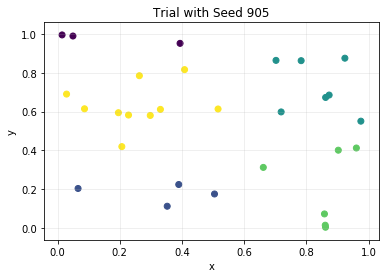

In [63]:
run_2df30 = run_kmeans_plus10(5, rand_data2, 905, x_col='x', y_col='y')

In [ ]:
# create your own dataset of 30 points

# generate an elbow plot for that data

#### Normalize salary data

In [66]:
scaler.fit(salary_data[['age']])
salary_data['normalized_age'] = scaler.transform(salary_data[['age']])
salary_data.head()

age  income  normalized_income  normalized_age
0   14    2500           0.005556        0.000000
1   15    5500           0.038889        0.018182
2   16    5000           0.033333        0.036364
3   15    4500           0.027778        0.018182
4   16    2000           0.000000        0.036364

In [65]:
scaler = MinMaxScaler()
scaler.fit(salary_data[['income']])
salary_data['normalized_income'] = scaler.transform(salary_data[['income']])
salary_data.head()

age  income  normalized_income
0   14    2500           0.005556
1   15    5500           0.038889
2   16    5000           0.033333
3   15    4500           0.027778
4   16    2000           0.000000

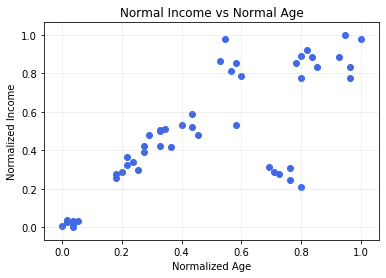

In [74]:
plt.scatter(salary_data.normalized_age, salary_data.normalized_income, color = "royalblue")
plt.xlabel("Normalized Age")
plt.ylabel("Normalized Income")
plt.title("Normal Income vs Normal Age")
plt.grid(True, alpha = 0.25)

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/rel

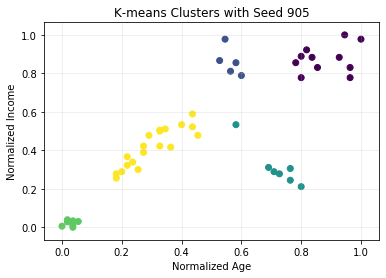

In [72]:
km = KMeans(n_clusters=5, init='random', n_init=10, random_state = 905) # or whatever number of k you want
cluster_labels = km.fit_predict(salary_data[['normalized_age', 'normalized_income']])
salary_data['normalized_cluster'] = cluster_labels
plt.scatter(salary_data.normalized_age, salary_data.normalized_income, c=km.labels_.astype(float))
plt.xlabel("Normalized Age")
plt.ylabel("Normalized Income")
plt.title("K-means Clusters with Seed 905")
plt.grid(True, alpha = 0.25)

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

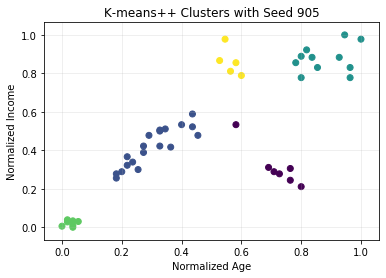

In [75]:
km = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state = 905) # or whatever number of k you want
cluster_labels = km.fit_predict(salary_data[['normalized_age', 'normalized_income']])
salary_data['normalized_cluster'] = cluster_labels
plt.scatter(salary_data.normalized_age, salary_data.normalized_income, c=km.labels_.astype(float))
plt.xlabel("Normalized Age")
plt.ylabel("Normalized Income")
plt.title("K-means++ Clusters with Seed 905")
plt.grid(True, alpha = 0.25)

# Task 2 

We'll use Sklearn's <code>make_classification</code> method to generate a dataset. See documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

We aren't interested in the labels per-se, but it will generate some nicely clustered data for us to try out some algorithms on.

In [161]:
# define dataset
data_values, class_labels = make_classification(n_samples=3000, n_features=2, n_informative=2, n_redundant=0, n_classes = 2, n_clusters_per_class=2,  random_state= 303)


C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\datasets\samples_generator.py:189: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros(n_samples, dtype=np.int)
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\datasets\samples_generator.py:30: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review y

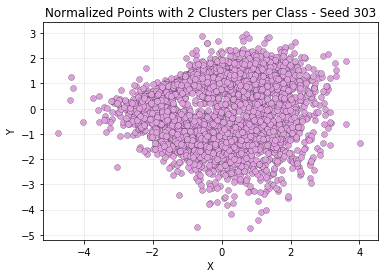

In [162]:
# create scatter plot for samples from each class
for class_value in range(len(unique(class_labels))):
    # get row indexes for samples with this class
    row_ix = np.where(class_labels == class_value)
    # create scatter of these samples
    plt.scatter(data_values[row_ix, 0], data_values[row_ix, 1], c = "plum", linewidths = 0.2, edgecolors = "black")
# show the plot
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Normalized Points with 2 Clusters per Class - Seed 303")
plt.grid(True, alpha = 0.25)
plt.show()


In [312]:
# create scatter plot for samples from each class
for class_value in range(len(unique(class_labels))):
    # get row indexes for samples with this class
    row_ix = np.where(class_labels == class_value)
    # create scatter of these samples
    plt.scatter(data_values[row_ix, 0], data_values[row_ix, 1], linewidths = 0.2, edgecolors = "black")
# show the plot
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Normalized Points with 2 Clusters per Class - Seed 303")
plt.grid(True, alpha = 0.25)
plt.show()

In [172]:
k_frame = pd.DataFrame(data_values, columns = ["x", "y"])
k_frame.sort_values(by = "x")

x         y
1694 -4.733662 -0.973050
2202 -4.409129  0.328300
2154 -4.358334  1.261389
58   -4.321743  0.826715
2273 -4.024949 -0.521945
...        ...       ...
64    3.306552  1.290013
2193  3.323652  1.551523
2472  3.609009  1.889647
156   3.621020 -0.599586
2428  4.019805 -1.380379

[3000 rows x 2 columns]

#### K-means

In [175]:
get_elbow_plot(k_frame, x_col='x', y_col='y')

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\Jesus\Anaconda3\lib\site-packages\sklearn\metrics\pairw

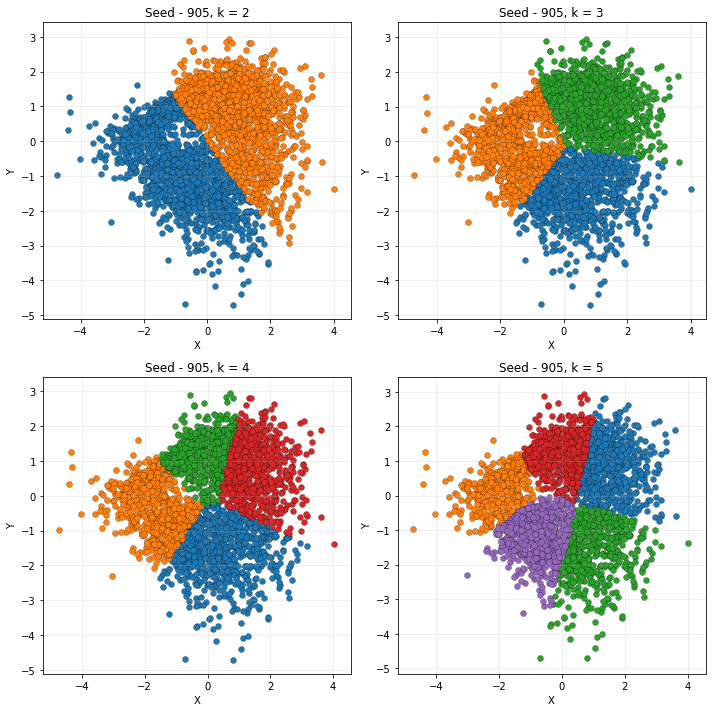

In [316]:
k_values = [[2,3],[4,5]]
fig1, axes1 = plt.subplots(2, 2, figsize = (10, 10))
row = 0

for i in range(2):
    for j in range(2):
        kmeans_model = KMeans(n_clusters= k_values[i][j], init='k-means++', n_init=10, random_state = 905) # set k to whatever makes sense for your data
        kmeans_model.fit(data_values)
        kmeans_clusters = kmeans_model.predict(data_values)

# create scatter plot for samples from each cluster
        for cluster in unique(kmeans_clusters):
            # get row indexes for samples with this cluster
            row_ix = np.where(kmeans_clusters == cluster)
            # create scatter of these samples
            axes1[i,j].scatter(data_values[row_ix, 0], data_values[row_ix, 1], linewidths = 0.2, edgecolors = "black")
            axes1[i,j].set_xlabel("X")
            axes1[i,j].set_ylabel("Y")
            axes1[i,j].set_title("Seed - 905, k = {}".format(k_values[i][j]))
            axes1[i,j].grid(True, alpha = 0.25)
# show the plot
fig1.tight_layout()
plt.show()

#### DBSCAN

Found 2 clusters
<class 'tuple'>
<class 'tuple'>


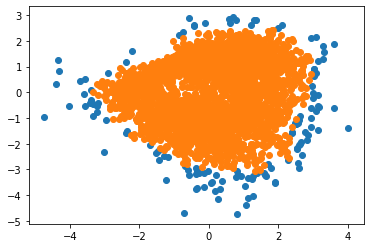

In [266]:
dbscan_model = DBSCAN(eps=0.3, min_samples=10)
dbscan_clusters = dbscan_model.fit_predict(data_values)

print(f'Found {len(unique(dbscan_clusters))} clusters')

# create scatter plot for samples from each cluster
for cluster in unique(dbscan_clusters):
    # get row indexes for samples with this cluster
    row_ix = np.where(dbscan_clusters == cluster)
    print(type(row_ix))
    # create scatter of these samples
    plt.scatter(data_values[row_ix, 0], data_values[row_ix, 1])
# show the plot
plt.show()

Found 63 clusters
Found 10 clusters
Found 3 clusters
Found 19 clusters
Found 14 clusters
Found 24 clusters
Found 4 clusters
Found 3 clusters
Found 2 clusters


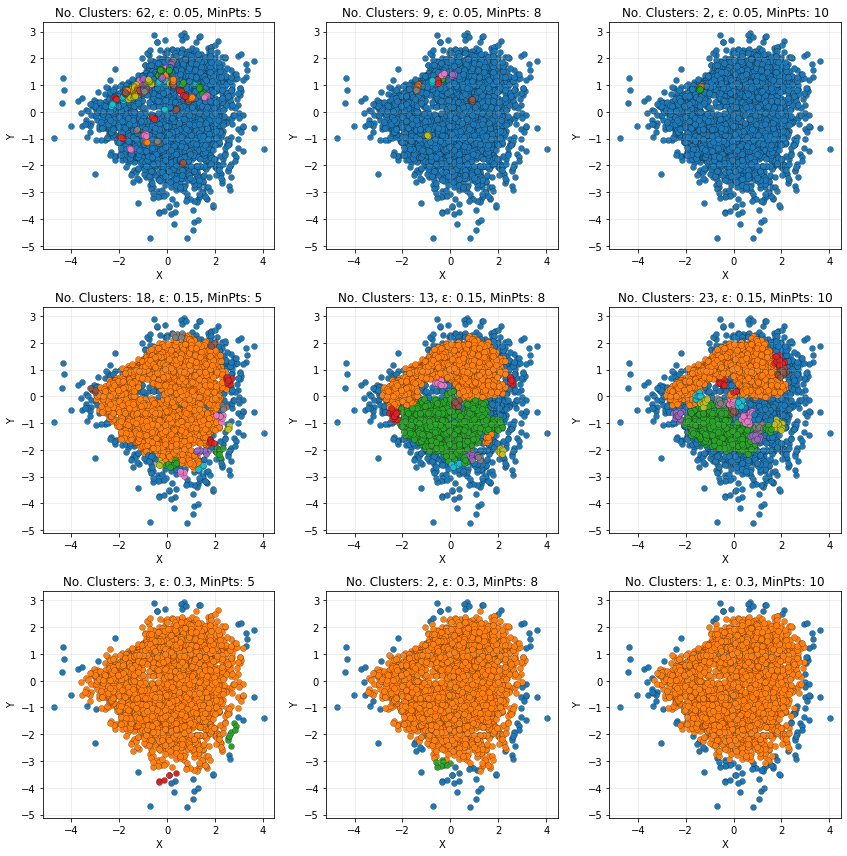

In [202]:
epsilon = [0.05, 0.15, 0.30]
samples = [5, 8, 10]
fig2, axes2 = plt.subplots(3, 3, figsize = (12, 12))
row = 0

for e in epsilon:
    col = 0
    for s in samples:
        dbscan_model = DBSCAN(eps= e, min_samples= s)
        dbscan_clusters = dbscan_model.fit_predict(data_values)
        
        print(f'Found {len(unique(dbscan_clusters))} clusters')

        # create scatter plot for samples from each cluster
        for cluster in unique(dbscan_clusters):
            # get row indexes for samples with this cluster
            row_ix = np.where(dbscan_clusters == cluster)
            # create scatter of these samples
            axes2[row,col].scatter(data_values[row_ix, 0], data_values[row_ix, 1],linewidths = 0.2, edgecolors = "black")
            axes2[row,col].set_xlabel("X")
            axes2[row,col].set_ylabel("Y")
            axes2[row,col].set_title("No. Clusters: {}, ε: {}, MinPts: {}".format(len(unique(dbscan_clusters))-1,e,s))
            axes2[row,col].grid(True, alpha = 0.25)
        col += 1
    row += 1
# show the plot
fig2.tight_layout()
plt.show()
        
        

#### Some other algorithm....

In [215]:
k_frame["x"]

0      -2.605405
1       1.740116
2       0.426225
3       1.278913
4      -0.574167
          ...   
2995   -0.513883
2996   -0.575248
2997    0.152065
2998    0.920762
2999   -0.531366
Name: x, Length: 3000, dtype: float64

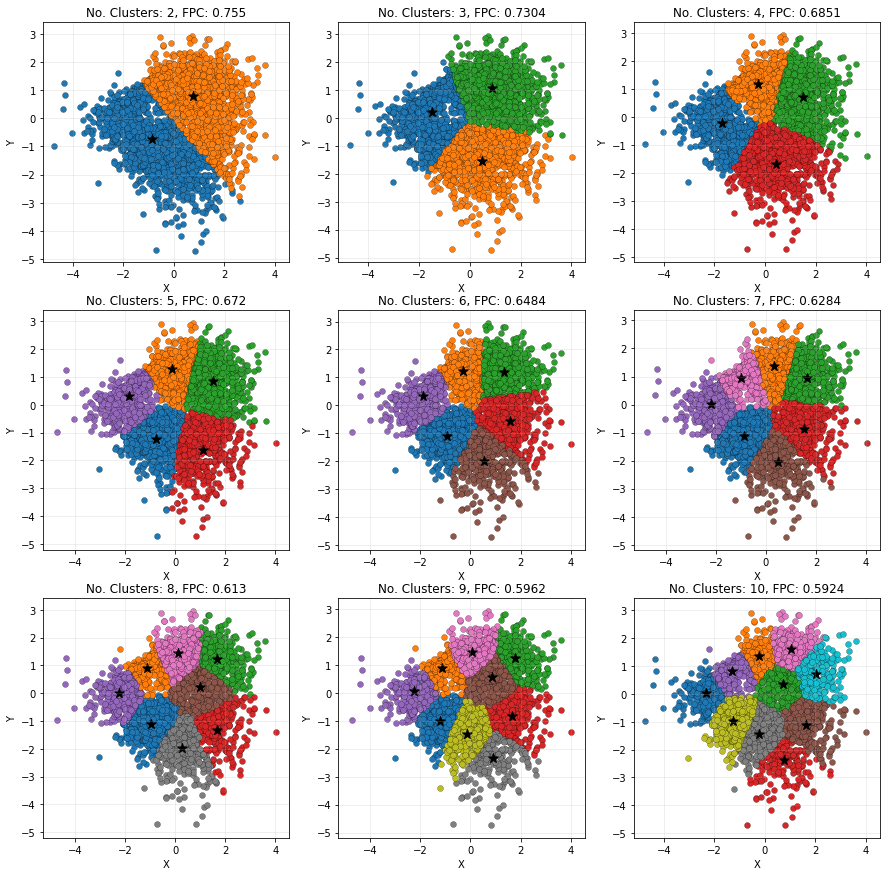

In [318]:
# your code here
#Fuzzy

cluster_matrix = [[2,3,4], [5,6,7], [8,9,10]]


# Set up the loop and plot
fig3, axes3 = plt.subplots(3, 3, figsize=(15, 15))
#mi data es data_values
fpc_values = []

row = 0
for r in range(3):
    col = 0
    for c in range(3):
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        k_frame.T, cluster_matrix[row][col], 1.75, error=0.005, maxiter=1000, init=None, seed = 905)

        # Plot assigned clusters, for each data point in training set
        cluster_membership = np.argmax(u, axis=0)
        fpc_values.append(fpc)
        
        for j in range(cluster_matrix[row][col]):
            row_ix = np.where(cluster_membership == j )
            axes3[row,col].scatter(
                k_frame["x"].loc[row_ix[0]], k_frame["y"].loc[row_ix[0]],linewidths = 0.2, edgecolors = "black")
        for c in range(cluster_matrix[row][col]):
            axes3[row,col].scatter(
                x = cntr[c][0], y = cntr[c][1], marker = "*", color = "black", linewidth = 1, edgecolors = "black", s = 100)
        axes3[row,col].set_xlabel("X")
        axes3[row,col].set_ylabel("Y")
        axes3[row,col].set_title("No. Clusters: {}, FPC: {}".format(cluster_matrix[row][col],round(fpc,4)))
        axes3[row,col].grid(True, alpha = 0.25)
        col += 1
    
    row += 1
        

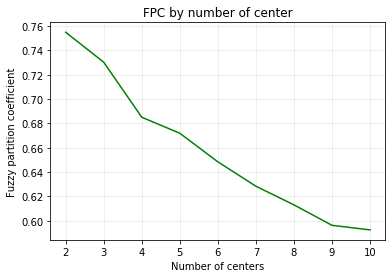

In [313]:
fig5, ax5 = plt.subplots()
ax5.plot(np.r_[2:11], fpc_values, color = "green")
ax5.set_xlabel("Number of centers")
ax5.set_ylabel("Fuzzy partition coefficient")
ax5.set_title("FPC by number of center")
ax5.grid(True, alpha = 0.25)

In [204]:
pip install -U scikit-fuzzy

  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894074 sha256=0e933def03d4996decaa51f05aba097d0dbf4758ca13ed6fe51bccf25a36b68f
  Stored in directory: C:\Users\Jesus\AppData\Local\pip\Cache\wheels\b9\4e\77\da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy
Note: you may need to restart the kernel to use updated packages.


In [209]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7]]

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

Text(0.5, 1.0, 'Test data: 200 points x3 clusters.')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1
 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0
 0 1 1 1 0 0 1 1 0 0 0 0 

[1 4 4 4 4 1 1 4 4 1 4 1 1 4 1 1 1 1 4 1 1 4 1 4 1 1 4 1 4 1 1 1 4 4 1 4 1
 4 1 1 4 4 4 4 1 1 1 1 4 4 1 4 1 1 4 4 4 1 1 4 4 1 1 1 1 4 4 4 4 4 1 4 4 4
 4 1 4 4 1 4 1 1 4 4 1 1 1 4 4 1 4 4 4 1 1 1 1 4 4 4 1 1 1 1 1 1 4 4 4 4 4
 1 4 4 4 1 4 4 1 4 4 4 1 4 1 4 4 1 1 4 1 1 4 1 4 1 4 1 1 4 1 4 4 1 4 4 4 1
 1 4 4 4 4 1 4 4 1 4 4 1 4 1 4 4 1 4 4 4 4 1 1 1 1 4 4 4 4 4 4 1 4 4 1 1 4
 1 4 4 4 1 1 1 4 4 1 4 4 1 4 4 1 0 3 5 5 0 5 3 3 3 5 5 0 0 3 5 0 0 5 5 0 3
 5 5 5 5 3 3 0 0 5 3 5 0 0 3 3 5 0 3 3 0 5 0 3 0 0 3 0 0 0 5 5 0 3 5 0 0 0
 0 0 3 3 0 3 3 0 0 5 3 5 5 3 0 0 3 3 3 5 5 5 5 3 0 0 3 0 0 0 5 5 0 5 3 0 5
 0 0 3 5 0 3 5 3 3 3 0 3 5 3 5 0 0 0 0 0 5 0 0 0 0 0 3 3 5 0 0 0 0 3 3 0 3
 0 3 5 0 0 5 5 5 3 3 3 0 0 3 0 3 3 3 3 3 3 5 3 5 0 0 3 5 3 5 5 0 5 3 0 5 0
 5 5 3 5 5 5 3 3 0 0 5 0 3 0 5 5 5 5 0 0 3 0 0 0 3 3 5 0 0 0 0 9 8 2 7 8 8
 9 8 6 7 9 8 6 2 9 8 2 2 2 6 8 6 6 9 8 6 6 8 8 7 8 7 8 8 2 9 6 7 6 9 9 2 8
 2 2 9 9 6 8 8 7 8 8 6 6 7 8 9 8 2 9 7 6 6 7 7 2 9 2 6 8 8 8 7 9 6 7 2 9 6
 6 7 7 9 2 6 9 8 2 6 2 2 

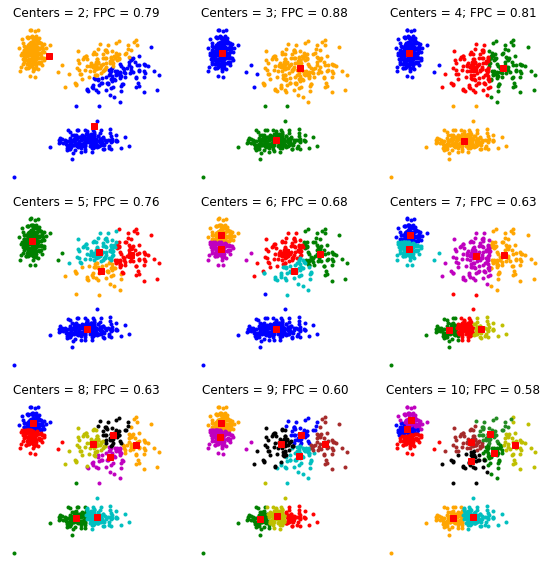

In [221]:
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    print(cluster_membership)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

In [299]:
u.shape

(10, 3000)

In [298]:
len(u[0])

3000